In [1]:
# Imports
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

In [2]:

# Load dataset
data = pd.read_csv(r"C:\Users\ABIRAINA\OneDrive\Desktop\guvi_project\miniproject3\Employee-Attrition - Employee-Attrition.csv")

In [3]:
# Encode categorical variables
label_encoders = {}
for col in data.select_dtypes(include="object").columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [4]:
# Features and target
X = data[['OverTime','JobInvolvement','YearsAtCompany']]
y = data["Attrition"]

In [6]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [7]:
# Balance training data using SMOTE
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

In [9]:
# Train KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train_bal, y_train_bal)

# Predict
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))



Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.74      0.82       380
           1       0.25      0.54      0.34        61

    accuracy                           0.71       441
   macro avg       0.58      0.64      0.58       441
weighted avg       0.82      0.71      0.75       441

Confusion Matrix:
 [[282  98]
 [ 28  33]]
ROC AUC Score: 0.6386540120793787


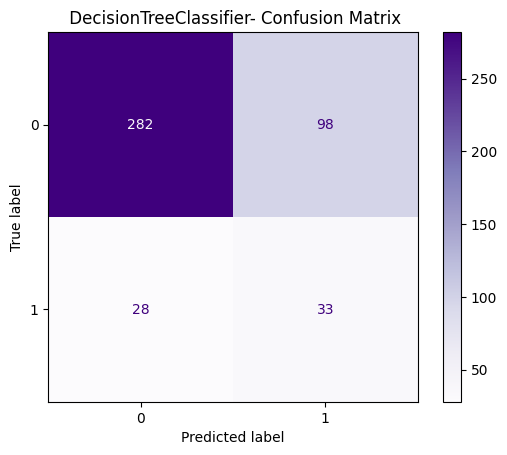

In [10]:
# Plot Confusion Matrix
disp = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap="Purples")
plt.title(" DecisionTreeClassifier- Confusion Matrix")
plt.show()

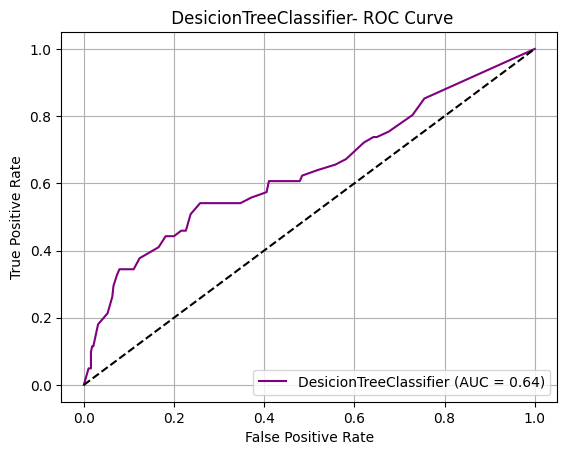

In [11]:
# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure()
plt.plot(fpr, tpr, label=f"DesicionTreeClassifier (AUC = {roc_auc_score(y_test, y_proba):.2f})", color='purple')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(" DesicionTreeClassifier- ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [12]:
import pickle
# Save the trained model
with open("decision_model.pkl", "wb") as f:
    pickle.dump(model, f)
print("Model saved as 'decision_model.pkl'")

Model saved as 'decision_model.pkl'
